# Notes on Support Vector Machines

From Chapter 5 of Hands-On Machine Learning textbook by Aurelien Geron. 

A Support Vector Machine (SVM) is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection. 
It is one of the most popular models in Machine Learning, and anyone interested in Machine Learning should have it in their toolbox. SVMs are particularly well suited for classification of complex but small- or medium-sized datasets.

## Linear SVM Classification

The fundamental idea behind SVMs is best explained with some pictures. The graph below shows part of the iris dataset. The two classes can clearly be separated easily with a straight line (they are linearly separable). The left plot shows the decision boundaries of three possible linear classifiers. The model whose decision boundary is represented by the dashed line is so bad that it does not even separate the classes properly. The other two models work perfectly on this training set, but their decision boundaries come so close to the instances that these
models will probably not perform as well on new instances. In contrast, the solid line in the plot on the right represents the decision boundary of an SVM classifier; this line not only separates the two classes but also stays as far away from the closest training instances as possible. 

**You can think of an SVM classifier as fitting the widest possible street (represented by the parallel dashed lines) between the classes.** 
#### This is called large margin classification.
- Notice that adding more training instances **“off the street”** will not affect the decision boundary at all:
- it is fully determined (or “supported”) by the instances located on the edge of the street. 
- These instances are called the support vectors (they are circled in the graph below)

In [4]:
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

[0, 5.5, 0, 2]

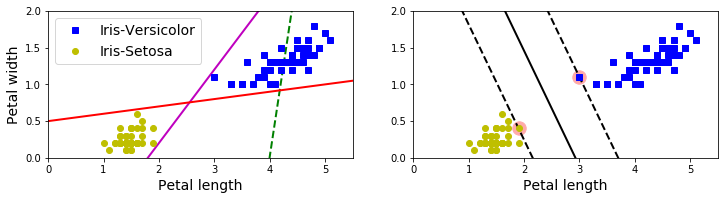

In [5]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

### SVMs are sensitive to feature scales:

- SVMs are sensitive to the feature scales, as you can see below: 
    - on the left plot, the vertical scale is much larger than the horizontal scale, so the widest possible street is close to horizontal.
    - After feature scaling (e.g., using Scikit-Learn’s StandardScaler), the decision boundary looks much better (on the right plot).

[-2, 2, -2, 2]

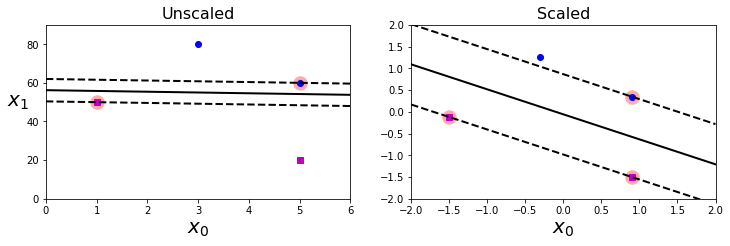

In [6]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

## HARD Margin Classification
If we **strictly impose that all instances be off the street and on the right side, this is called hard margin classification.** There are two main issues with hard margin classification:
1. First, it only works if the data is linearly separable
2. Second, it is quite sensitive to outliers. 

Below shows the iris dataset with just one additional outlier:
- on the left, it is impossible to find a hard margin, 
- and on the right the decision boundary ends up very different from the one we saw above without the outlier, and it will probably not generalize as well.


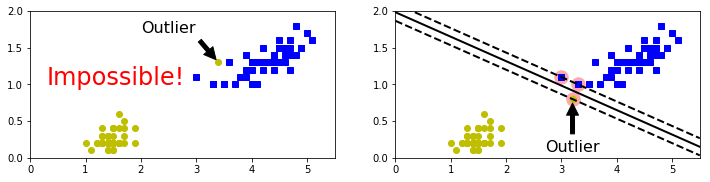

In [7]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)
plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.annotate("Outlier",xy=(X_outliers[0][0], X_outliers[0][1]),xytext=(2.5, 1.7),ha="center",arrowprops=dict(facecolor='black', shrink=0.1),fontsize=16,)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.annotate("Outlier",xy=(X_outliers[1][0], X_outliers[1][1]),xytext=(3.2, 0.08),ha="center",arrowprops=dict(facecolor='black', shrink=0.1),fontsize=16,)
plt.axis([0, 5.5, 0, 2])
plt.show()

## SOFT Maring Classification
To avoid these issues it is preferable to use a more flexible model. The objective is to find a good balance between keeping the street as large as possible and limiting the margin violations (i.e., instances that end up in the middle of the street or even on the wrong side). 

#### This is called soft margin classification.
In Scikit-Learn’s SVM classes, you can control this balance **using the C hyperparameter:** 
- a smaller C value leads to a wider street but more margin violations.
- Below shows the decision boundaries and margins of two soft margin SVM classifiers on a nonlinearly separable dataset. 
    - On the left, using a high C value the classifier makes fewer margin violations but ends up with a smaller margin. 
    - On the right, using a low C value the margin is much larger, but many instances end up on the street.
- it seems likely that the second classifier will generalize better:
    - in fact even on this training set it makes fewer prediction errors, since most of the margin violations are actually on the correct side of the decision boundary.

#### In general, if you SVC is overfitting the data, reduce the C parameter (increase the width of the street) to regularize

[4, 6, 0.8, 2.8]

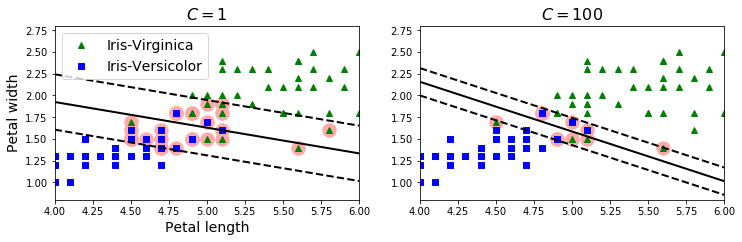

In [8]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

X = datasets.load_iris()
X = iris['data'][:,(2,3)] # petal length, petal width
y = (iris['target'] == 2).astype(np.float64) # Virgina class

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)
scaled_svm_clf1 = Pipeline([("scaler", scaler),("linear_svc", svm_clf1)])
scaled_svm_clf2 = Pipeline([("scaler", scaler),("linear_svc", svm_clf2)])
scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

## Three ways to implement an SVM Classifier:
1. LinearSVC class: ```LinearSVC(C=1, loss='hinge')```
2. SVC class: ```SCV(kernel='linear', c=1)```
    - This implementation is NOT reccomended, as it is much slower, especially with large traininer sets. 
3. SGDClassifier class: ```SGDClassifier(loss='hinge', alpha=1/(m*C))```
    - This applies Stochastic Gradient Descent to train a linear SVM classifier. 
    - It does not converge as fast as Linear SVC, but it can be useful to handle HUGE datasets that do not fit in memory (out of core training), or handling, or for online classification tasks
    
#### Using the LinearSVC class:
- The LinearSVC class regularizes the bias term, so you should center the training set first by subtracting its mean. This is automatic if you scale the data using the StandardScaler. 
- Moreover, make sure you set the loss hyperparameter to "hinge", as it is not the default value. 
- Finally, for better performance you should set the **dual hyperparameter to False, unless there are more features than training instances (we will discuss duality later).** 
    - `dual=False` means that you are using the primal problem to optimize the weight/bias params (which we discuss later), which does NOT use the kernel trick. This is better when there are FEWER features than observations.

```
Init signature: LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
Docstring:     
Linear Support Vector Classification.

Similar to SVC with parameter kernel='linear', but implemented in terms of
liblinear rather than libsvm, so it has more flexibility in the choice of
penalties and loss functions and should scale better to large numbers of
samples.

This class supports both dense and sparse input and the multiclass support
is handled according to a one-vs-the-rest scheme.

Read more in the :ref:`User Guide <svm_classification>`.

Parameters
----------
penalty : string, 'l1' or 'l2' (default='l2')
    Specifies the norm used in the penalization. The 'l2'
    penalty is the standard used in SVC. The 'l1' leads to ``coef_``
    vectors that are sparse.

loss : string, 'hinge' or 'squared_hinge' (default='squared_hinge')
    Specifies the loss function. 'hinge' is the standard SVM loss
    (used e.g. by the SVC class) while 'squared_hinge' is the
    square of the hinge loss.

dual : bool, (default=True)
    Select the algorithm to either solve the dual or primal
    optimization problem. Prefer dual=False when n_samples > n_features.

tol : float, optional (default=1e-4)
    Tolerance for stopping criteria.

C : float, optional (default=1.0)
    Penalty parameter C of the error term.

multi_class : string, 'ovr' or 'crammer_singer' (default='ovr')
    Determines the multi-class strategy if `y` contains more than
    two classes.
    ``"ovr"`` trains n_classes one-vs-rest classifiers, while
    ``"crammer_singer"`` optimizes a joint objective over all classes.
    While `crammer_singer` is interesting from a theoretical perspective
    as it is consistent, it is seldom used in practice as it rarely leads
    to better accuracy and is more expensive to compute.
    If ``"crammer_singer"`` is chosen, the options loss, penalty and dual
    will be ignored.

fit_intercept : boolean, optional (default=True)
    Whether to calculate the intercept for this model. If set
    to false, no intercept will be used in calculations
    (i.e. data is expected to be already centered).

intercept_scaling : float, optional (default=1)
    When self.fit_intercept is True, instance vector x becomes
    ``[x, self.intercept_scaling]``,
    i.e. a "synthetic" feature with constant value equals to
    intercept_scaling is appended to the instance vector.
    The intercept becomes intercept_scaling * synthetic feature weight
    Note! the synthetic feature weight is subject to l1/l2 regularization
    as all other features.
    To lessen the effect of regularization on synthetic feature weight
    (and therefore on the intercept) intercept_scaling has to be increased.

class_weight : {dict, 'balanced'}, optional
    Set the parameter C of class i to ``class_weight[i]*C`` for
    SVC. If not given, all classes are supposed to have
    weight one.
    The "balanced" mode uses the values of y to automatically adjust
    weights inversely proportional to class frequencies in the input data
    as ``n_samples / (n_classes * np.bincount(y))``

verbose : int, (default=0)
    Enable verbose output. Note that this setting takes advantage of a
    per-process runtime setting in liblinear that, if enabled, may not work
    properly in a multithreaded context.

random_state : int, RandomState instance or None, optional (default=None)
    The seed of the pseudo random number generator to use when shuffling
    the data.  If int, random_state is the seed used by the random number
    generator; If RandomState instance, random_state is the random number
    generator; If None, the random number generator is the RandomState
    instance used by `np.random`.

max_iter : int, (default=1000)
    The maximum number of iterations to be run.

Attributes
----------
coef_ : array, shape = [n_features] if n_classes == 2 else [n_classes, n_features]
    Weights assigned to the features (coefficients in the primal
    problem). This is only available in the case of a linear kernel.

    ``coef_`` is a readonly property derived from ``raw_coef_`` that
    follows the internal memory layout of liblinear.

intercept_ : array, shape = [1] if n_classes == 2 else [n_classes]
    Constants in decision function.
``` 
    
    
    

## Nonlinear SVM Classification
Although linear SVM classifiers are efficient and work suprisingly well in many cases, many datasets are not even close to being linearly seperable. One approach to handling nonlinear datasets is to add more features, such as polynomial feature, in some cases this can result in a linearly separable dataset. Consider the plot below: it represents a simple dataset with just one feature (x1). This dataset is non linearly separable, but if you add a second features x2=x1^2, the resulting 2D dataset is perfectly linearly separable.

![](pictures/homl_ch05_nonlinearsvm.jpg)

Try this approach on the moons dataset below:

C:\Users\mciniello\AppData\Local\Continuum\anaconda3\envs\tf_env\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


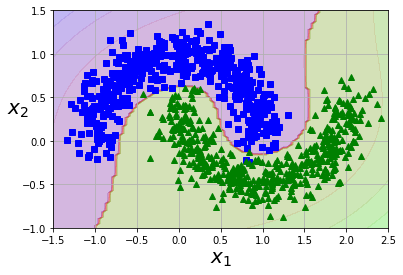

In [9]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# Get data
X, y = make_moons(n_samples=1000, noise=0.15, random_state=42)

# Set up model
polynomial_svm_clf = Pipeline([('polyfeats', PolynomialFeatures(degree=3)),
                           ('scaler', StandardScaler()),
                           ('svm_clf', LinearSVC(C=10, loss='hinge'))])

# Run model
polynomial_svm_clf.fit(X,y)

# Plot decision boundary
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

## Polynomial Kernel
Adding polynomial features is simple to implement and can work great with all sorts of ML algos. But even low polynomial degree has difficulty dealing with complex datasets, and a HIGH polynomial degree creates a HUGE number of features, making the model too slow.

Fortunately, when using SVMs you can apply the miraculous mathematical technique called the **kernel trick**. It makes it possible to get the same result as if you added many polynomial features, even with very high degree polynomials, WITHOUT ACTUALLY HAVING TO ADD THEM!!! So there is no cominatorial explosion of the number of featurs since you actually dont add any features. The trick is implemented with the SVC class. 

Let's try it on the moons data.

C:\Users\mciniello\AppData\Local\Continuum\anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.
C:\Users\mciniello\AppData\Local\Continuum\anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


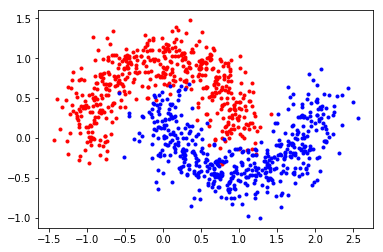

In [10]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
class0 = [y==0]
class1 = [y==1]
plt.plot(X[:,0][class0], X[:,1][class0],'r.')
plt.plot(X[:,0][class1], X[:,1][class1],'b.')

The code below trains a SVM classifer using different degree polynomial kernels. As we know, if your model is overfitting, you need to reduce the polynomial degree, and increase the polynomial degree if you are underfitting. 

#### The hyperparameter coef0 controls how much the model is influenced by HIGH DEGREE polynomials versus low degree polynomials. 

Here's what the graphs should look like if you were to run the code:

![](pictures/homl_ch05_nonlinearsvm2.jpg)

In [11]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
poly_kernel_svc = Pipeline([('scale', StandardScaler()),
                           ('clf',SVC(kernel='poly', degree=3, coef0=1, C=5))])

poly_kernel_svc.fit(X,y)
poly_kernel_svc.score(X,y)

0.977

In [12]:
poly_kernel_svc = Pipeline([('scale', StandardScaler()),
                           ('clf',SVC(kernel='poly', degree=10, coef0=1, C=5))])

poly_kernel_svc.fit(X,y)
poly_kernel_svc.score(X,y)

0.979

# Adding Similarity Features

Another technique to tackle nonlinear problems is to add feature computed using a **similarity function** that measures how much each instance resembles a particular landmark. For example, lets take the one dimensional dataset discussed earlier, and add two landmarks at x1:
- x1 = -2
- x1 = 1

Next lets define the similarity function to be the **Gaussian Radial Bias Function (RBF) with γ=0.3:**
![](pictures/homl_ch05_rbf.jpg)

It is a bell shaped function, varying from:
- 0 (very far away from the landmark)
- 1 (at the landmark)
![](pictures/homl_ch05_rbf2.jpg)


Now we are ready to compute new features. For examples lets look at `x1=-1`:
- It is located at distance 1 from the first landmark, and 2 from the second landmark.
- Therforw its new features are:
    - `x2 = exp(-0.3 * 1^2) = 0.74`
    - `x3 = exp(-0.3 * 2^2) = 0.30`
    
We can see these new features plotting on the right graph above, and  they are now **linearly seperable**.



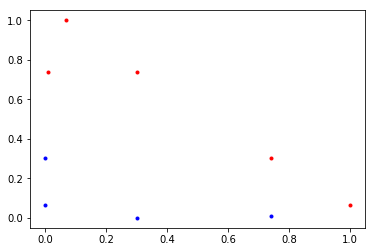

In [13]:
def similarity_distances(X, landmarks, gamma):
    distances={}
    for i, l in enumerate(landmarks):
        distances['x'+str(i)] = np.array([np.exp(-gamma*(x-l)**2) for x in X])
    return distances

y = np.array([0,0,1,1,1,1,1,0,0])
dist = similarity_distances(X = [-4, -3, -2, -1, 0, 1, 2, 3, 4],
                            landmarks = [-2, 1],
                            gamma = 0.3)

plt.plot(dist['x0'][y==1],dist['x1'][y==1], 'r.')
plt.plot(dist['x0'][y==0],dist['x1'][y==0], 'b.')

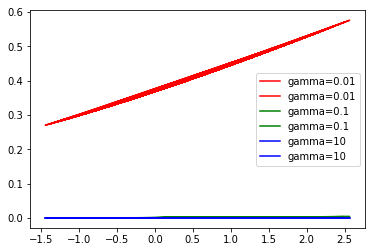

In [14]:
dist0 = similarity_distances(X = X, landmarks = [10], gamma = 0.01)
dist1 = similarity_distances(X = X, landmarks = [10], gamma = 0.1)
dist2 = similarity_distances(X = X, landmarks = [10], gamma = 10)

plt.plot(X,dist0['x0'], 'r-', label="gamma=0.01")
plt.plot(X,dist1['x0'], 'g-', label="gamma=0.1")
plt.plot(X,dist2['x0'], 'b-', label="gamma=10")
plt.legend()

## Choosing the right RBF hyperparams
The simplest approach is to simply create a landmark at EACH LOCATION AND EVERY INSTANCE in the dataset. This creates way to many dimensions and will increase the chances of the data becoming linearly seperable.

However, with m instance and n features, you will get a training set with m instance and m features (assuming you prop the original features)....


## Gausian RBF kernel
Just like the polynomial features method, the similarity features method can be useful WITH ANY ML ALGO, but it may be computationally expensive with all the additional features. However once again we can use the magic SVM kernel trick, so you can obtain similar results without actaully adding the features. 

This model is represented below. The plots show models trained with
different values of hyperparameters gamma (γ) and C. 

#### High γ (gamma) value:
Increasing gamma makes the **bell-shape curve narrower, and as a result each instance’s range of influence is smaller:** the decision boundary ends up being more irregular, wiggling around individual instances.

#### Low γ (gamma) value:
Conversely, a small gamma value makes the **bell-shaped curve wider, so instances have a larger range of influence, and the decision boundary ends up smoother.** So γ acts like a regularization hyperparameter.

### If your model is overfitting, you should reduce gamma, and if it is underfitting, you should increase it (similar to the C hyperparameter).
![](pictures/homl_ch05_rbf3.jpg)

In [15]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

rbf_clf = Pipeline([('scaler', StandardScaler()),
                   ('clf', SVC(kernel='rbf', gamma=5, C=0.001))])

rbf_clf.fit(X,y)
rbf_clf.score(X,y)

0.968

```
Init signature: SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time complexity
is more than quadratic with the number of samples which makes it hard
to scale to dataset with more than a couple of 10000 samples.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the corresponding section in the narrative documentation:
:ref:`svm_kernels`.

Read more in the :ref:`User Guide <svm_classification>`.

Parameters
----------
C : float, optional (default=1.0)
    Penalty parameter C of the error term.

kernel : string, optional (default='rbf')
     Specifies the kernel type to be used in the algorithm.
     It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
     a callable.
     If none is given, 'rbf' will be used. If a callable is given it is
     used to pre-compute the kernel matrix from data matrices; that matrix
     should be an array of shape ``(n_samples, n_samples)``.

degree : int, optional (default=3)
    Degree of the polynomial kernel function ('poly').
    Ignored by all other kernels.

gamma : float, optional (default='auto')
    Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
    If gamma is 'auto' then 1/n_features will be used instead.

coef0 : float, optional (default=0.0)
    Independent term in kernel function.
    It is only significant in 'poly' and 'sigmoid'.

probability : boolean, optional (default=False)
    Whether to enable probability estimates. This must be enabled prior
    to calling `fit`, and will slow down that method.

shrinking : boolean, optional (default=True)
    Whether to use the shrinking heuristic.

tol : float, optional (default=1e-3)
    Tolerance for stopping criterion.

cache_size : float, optional
    Specify the size of the kernel cache (in MB).

class_weight : {dict, 'balanced'}, optional
    Set the parameter C of class i to class_weight[i]*C for
    SVC. If not given, all classes are supposed to have
    weight one.
    The "balanced" mode uses the values of y to automatically adjust
    weights inversely proportional to class frequencies in the input data
    as ``n_samples / (n_classes * np.bincount(y))``

verbose : bool, default: False
    Enable verbose output. Note that this setting takes advantage of a
    per-process runtime setting in libsvm that, if enabled, may not work
    properly in a multithreaded context.

max_iter : int, optional (default=-1)
    Hard limit on iterations within solver, or -1 for no limit.

decision_function_shape : 'ovo', 'ovr', default='ovr'
    Whether to return a one-vs-rest ('ovr') decision function of shape
    (n_samples, n_classes) as all other classifiers, or the original
    one-vs-one ('ovo') decision function of libsvm which has shape
    (n_samples, n_classes * (n_classes - 1) / 2).

    .. versionchanged:: 0.19
        decision_function_shape is 'ovr' by default.

    .. versionadded:: 0.17
       *decision_function_shape='ovr'* is recommended.

    .. versionchanged:: 0.17
       Deprecated *decision_function_shape='ovo' and None*.

random_state : int, RandomState instance or None, optional (default=None)
    The seed of the pseudo random number generator to use when shuffling
    the data.  If int, random_state is the seed used by the random number
    generator; If RandomState instance, random_state is the random number
    generator; If None, the random number generator is the RandomState
    instance used by `np.random`.

Attributes
----------
support_ : array-like, shape = [n_SV]
    Indices of support vectors.

support_vectors_ : array-like, shape = [n_SV, n_features]
    Support vectors.

n_support_ : array-like, dtype=int32, shape = [n_class]
    Number of support vectors for each class.

dual_coef_ : array, shape = [n_class-1, n_SV]
    Coefficients of the support vector in the decision function.
    For multiclass, coefficient for all 1-vs-1 classifiers.
    The layout of the coefficients in the multiclass case is somewhat
    non-trivial. See the section about multi-class classification in the
    SVM section of the User Guide for details.

coef_ : array, shape = [n_class-1, n_features]
    Weights assigned to the features (coefficients in the primal
    problem). This is only available in the case of a linear kernel.

    `coef_` is a readonly property derived from `dual_coef_` and
    `support_vectors_`.

intercept_ : array, shape = [n_class * (n_class-1) / 2]
    Constants in decision function.
    ```

**Other kernels exist but are used much more rarely. For example, some kernels are specialized for specific data structures. String kernels are sometimes used when classifying text documents or DNA sequences (e.g., using the string subsequence kernel or kernels based on the Levenshtein distance).**

#### PRO TIP: With so many kernels to choose from, how can you decide which one to use? 
- As a rule of thumb, you should **always try the linear kernel first (remember that LinearSVC is much faster than SVC(kernel="linear"))**, especially if the training set is very large or if it has plenty of features. 
- If the training set is not too large, you should try the Gaussian RBF kernel as well; it works well in most cases. 
- Then if you have spare time and computing power, you can also experiment with a few other kernels using cross-validation and grid search, especially if there are kernels specialized for your training set’s data structure.

## Computational Complexity
The **LinearSVC class is based on the liblinear library, which implements an optimized algorithm for linear SVMs. It does not support the kernel trick (BECAUSE IT USES THE PRIMAL QUADRATIC FORM FOR OPTIMIZATION, SEE MORE BELOW), but it scales almost linearly with the number of training instances and the number of features: its training time complexity is roughly O(m × n).** 
- NOTE: The algorithm takes **longer if you require a very high precision.** This is controlled by the tolerance hyperparameter ϵ (called tol in Scikit-Learn). In most classification tasks, the default tolerance is fine.

The SVC class is based on the libsvm library, which implements an algorithm that supports the kernel trick **(THIS IS THE DUAL PROBLEM, SEE MORE BELOW)**. The training time complexity is usually between O(m2 × n) and O(m3 × n). Unfortunately, this means that it gets dreadfully slow when the number of training instances gets large (e.g., hundreds of thousands of instances). This algorithm is perfect for complex but small or medium training sets. However, **it scales well with the number of features, especially with sparse features (i.e., when each instance has few nonzero features).** In this case, the algorithm scales roughly with the average number of nonzero features per instance. Table 5-1 compares Scikit-Learn’s SVM classification classes.
![](pictures/homl_ch05_complexity.jpg)

# SVM Regression

The SVM algorithm is quite versatile: **not only does it support linear and nonlinear classification, but it also supports linear and nonlinear regression.** The trick is to **reverse the objective:** instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM Regression tries to fit as many instances as possible ON the street while limiting margin violations (i.e., instances off the street). The width of the street is controlled by a
hyperparameter ϵ.

The graph below shows two linear SVM Regression models trained on some random linear data, one with a large margin (ϵ = 1.5) and the other with a small margin (ϵ = 0.5). Note that adding **more training instances within the margin does not affect the model’s predictions; thus, the model is said to be ϵ-insensitive.**

In [16]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [17]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

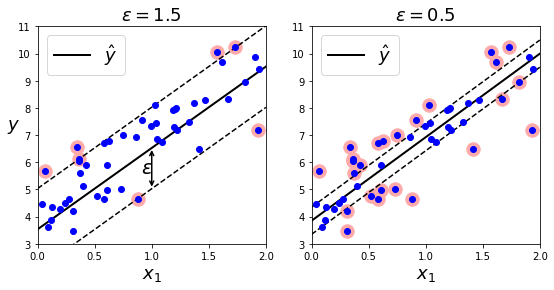

In [18]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

## Nonlinear regression tasks
To tackle nonlinear regression tasks, you can use a **kernelized SVM model**. For example, the plots below show SVM Regression on a random quadratic training set, using a 2nd-degree polynomial kernel.

There is little regularization on the left plot (i.e., a large C value), and much more regularization on
the right plot (i.e., a small C value).


C:\Users\mciniello\AppData\Local\Continuum\anaconda3\envs\tf_env\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mciniello\AppData\Local\Continuum\anaconda3\envs\tf_env\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


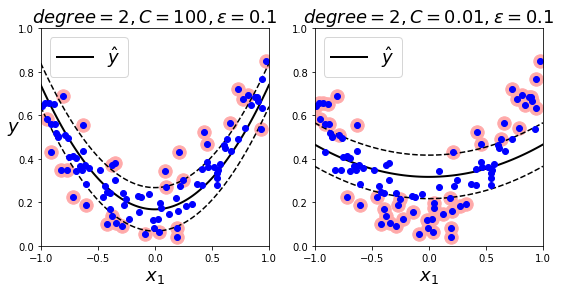

In [19]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()


from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

The **SVR class is the regression equivalent of the SVC class**, and the **LinearSVR class is the regression equivalent of the LinearSVC class.** The LinearSVR class scales linearly with the size of the training set (just like the LinearSVC class), while the SVR class gets much too slow when the training set grows large (just like the SVC class).

# Under the Hood
This section explains how SVMs make predictions and how their training algorithms work, starting with linear SVM classifiers.

###  Decision Function and Predictions
The linear SVM classifier model predicts the class of a new instance x by simply computing the **decision function:**
- wT · x + b = w1 x1 + ⋯ + wn xn + b 
- f the result is positive, the predicted class ŷ is the positive class (1), 
- or else it is the negative class (0);
![](pictures/homl_ch05_linearsvc.jpg)

The graph below shows the decision function that corresponds to the linearSVC classifier trained above. It is a two-dimensional plane since this dataset has two features (petal width and petal length). 
- **The decision boundary is the set of points where the decision function is equal to 0**: it is the intersection of two planes, which is a straight line (represented by the thick solid line).
- The dashed lines represent the points where the **decision function is equal to 1 or –1:** they are parallel and at equal distance to the decision boundary, forming a margin around it. 

Training a linear SVM classifier means finding the value of w and b that make this margin **as wide as possible while avoiding margin violations (hard margin) or limiting them (soft margin)**.
![](pictures/homl_ch05_linearsvm2.jpg)

### Training Objective
Consider the **slope of the decision function (THE GRADIENTS!!!!): **it is equal to the norm of the weight vector, | w |.** 
- If we divide this slope by 2, the points where the decision function is equal to ±1 are going to be twice as far away from the decision boundary. In other words, dividing the slope by 2 will multiply the margin by 2. Perhaps this is easier to visualize in 2D in the following graph. The smaller the weight vector w, the larger the margin.
![](pictures/homl_ch05_linearsvm3.jpg)

- So we want to **minimize ∥ w ∥ to get a large margin**. 
- However, if we also want to avoid any margin violation (hard margin), then we need the decision function to be greater than 1 for all positive training instances, and lower than –1 for negative training instances. 

If we define:
- t(i) = –1 for negative instances (if y(i) = 0) and 
- t(i) = 1 for positive instances (if y(i) = 1), 

... then we can express this constraint as t(i)(wT · x(i) + b) ≥ 1 for all instances. We can therefore express the hard margin linear SVM classifier objective as the constrained optimization problem in the Equation below.

![](pictures/homl_ch05_linearsvm4.jpg)
![](pictures/homl_ch05_linearsvm5.jpg)

#### Soft Margin Slack Term

To get the soft margin objective, we need to introduce a slack variable ζ(i) ≥ 0 for each instance:
- ζ(i) measures how much the ith instance is allowed to violate the margin. 

We now have two conflicting objectives: 
1. making the slack variables as small as possible to reduce the margin violations, and 
2. making wT · w as small as possible to increase the margin. 

**This is where the C hyperparameter comes in:** it allows us to define the tradeoff between these two objectives. This gives us the constrained optimization problem below:

![](pictures/homl_ch05_linearsvm6.jpg)

This makes sense! As the slack param gets bigger, it makes the margin (-1 or 1) smaller, allowing more observations to cross the threshold. 

## Quadratic Programming
The hard margin and soft margin problems are both **convex quadratic optimization problems with linear constraints.** Such problems are known as **Quadratic Programming (QP) problems.** Many off-the-shelf solvers are available to solve QP problems using a variety of techniques that are outside the scope of this notebook. The general problem formulation is given below however:
![](pictures/homl_ch05_quadp.jpg)

Note that the expression A · p ≤ b actually defines n_c constraints: pT · a(i) ≤ b(i) for i = 1, 2, ⋯, n_c, where 
- a(i) is the vector containing the elements of the ith row of A and b(i) is the ith element of b.

You can easily verify that if you set the QP parameters in the following way, you get the hard margin linear SVM classifier objective:
- np = n + 1, where n is the number of features (the +1 is for the bias term).
- nc = m, where m is the number of training instances.
- H is the np × np identity matrix, except with a zero in the top-left cell (this is simply to remove the bias term)...
- f = 0, an np-dimensional vector full of 0s.
- b = 1, an n_c-dimensional vector full of 1s.
- a(i) = –t(i) A(i), where A(i) is equal to x(i) with an extra bias feature A0 = 1.

So one way to train a hard margin linear SVM classifier is just to use an off-the-shelf QP solver by passing it the preceding parameters. The resulting vector p will contain the bias term b = p0 and the feature weights wi = pi for i = 1, 2, ⋯, m. Similarly, **you can use a QP solver to solve the soft margin problem**. However, to use the kernel trick we are going to look at a different constrained optimization problem.

## Lagrangian Multipliers
Louis Lagrange invented a strategy for finding the local maxima and minima of a function subject to equality constraint. It is called the method of Lagrange Multipliers:

Lagrange noticed that when we try to solve an optimization problem in the form:
![](pictures/homl_ch05_lagr1.jpg)
... the minimum of `f` is found when its gradient points in the the same direction as the gradient of `g`, or when:
![](pictures/homl_ch05_lagr2.jpg)
So if we want to find the minimum of f under the constraint g, we just need to solve for:
![](pictures/homl_ch05_lagr3.jpg)
Here, the alpha term is called a lagrange multipler:

![](pictures/homl_ch05_lagr4.jpg)




## The Dual Problem
Given a constrained optimization problem, known as the primal problem, it is possible to express a different but closely related problem, called its dual problem. The solution to the dual problem typically gives a lower bound to the solution of the primal problem, but under some conditions it can even have the same solutions as the primal problem. Luckily, the SVM problem happens to meet these conditions, **so you can choose to solve the primal problem or the dual problem**; both will have the same solution. The below equation shows the dual form of the linear SVM objective.
![](pictures/homl_ch05_dualp.jpg)

1. We first convert the primal problem to the **Lagrangian function**, which is essentially setting the gradients of the obective function and equality function to equal one another (thats how we find the global min/max!!!). When the gradients are parallel (or proportaionl then we found the maximum/minimum) Here we want to maximize the alpha params (the Langrage multipliers) and minimize a and b:
    - Remember, langrage multipliers (alpha terms) are multipliers (proportionality constant) used to find point where gradients are tangent to one another (the same slope). This is because gradients will likely not have the same magnitideu, but need scalar to make them equal... They are proportional, not equal. The langrage multiplier makes them equal.
    - We then set the derrivatives to zero (ie, set ALL of its partial derivtives to zero)
![](pictures/homl_ch05_dualp5.jpg)
![](pictures/homl_ch05_dualp6.jpg)

2. Take the partial derivatives of the Langrangian function with respect to w and b. We set them to zero (where slope is zero), and isolate w: 
![](pictures/homl_ch05_dualp7.jpg)

    - This is the value of `w` that minimizes the lagrangian function 
![](pictures/homl_ch05_dualp8.jpg)

From khan academy:
https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/lagrange-multipliers-and-constrained-optimization/v/the-lagrangian



3. Substitute w into lagrangian and do some algebra:
![](pictures/homl_ch05_dualp9.jpg)

4. Note `gL/gb = 0`, so we can remove the gradient of b from the equation (the last term), and we get the following:
![](pictures/homl_ch05_dualp11.jpg)


5. We keep `gL/gb` as a constraint. And there you have it, you now have the dual lagrangian function, which depends ONLY on the lagrange multipliers (not the weights or b params).

![](pictures/homl_ch05_dualp10.jpg)

6. Traditionally the Wolfe Dual Lagrangian problem is constrained by the gradients being equal to zero. 
    - In theory, we should add the constratins: ![](pictures/homl_ch05_dualp12.jpg)
    - However we only added the latter (b), because it is necessary for removing it from the objective function. However, we can solve the problem without setting gL/gW to zero, because it is implicit in the objective function! 
    
#### The main advangtage of the dual problem over the Lagrangian problem is that the objective function now depends ONLY on the lagrange multipliers. The dual problem is also faster to solve than the primal when the number of training instances is smaller than the number of features. Moreover, this allows us to use the kernel trick (which we discuss shortly).


## What do we do once we have the multipliers?
We we solve the wolfe dual problem, we get a vector alpha containing all Lagrange multipliers. However, when we first stated the primal problem, out goal was to find w and b. Finding those is easy:

Simply plug alpa, x, and y into the formula we derived from gL/gw. We can do the same for b by plugging in the values of w,x and y into the our initial constraint function. There is a little extra math involved, but we can skip that for now:

![](pictures/homl_ch05_dualp2.jpg)




## Adding the slack parameter
The biggest issue with hard magin SVM is that it requires the data to be linearly separable. Real life data often isnt. When a datapoint is close to the hyperplane, it reduces the margin, and may make the algorithm overfit the data. Even worse, if the datapoint breaks linear seperability, the classifier is incapable of finidng a hyperplane. **We are stuck because of a single data point.** This is where the slack parameter comes in.

![](pictures/homl_ch05_linearsvm6.jpg)

We take the sume of all individual slack params values and add it to the objective function. Adding such a penalty is called **regularization**, and penalizes large slack param values in order to keep margins as wide as possible. As a result, the solution will be hyperplane that maximizs the margin while having the smallest error possible. 

This change also results in a slight change to the dual problem. 
![](pictures/homl_ch05_dualp13.jpg)
The constrain 0<alpha<C is often called the box constraint, because the vector alpha is constrained to lie inside the box with side length C in the positive orthant. Note that an orthant is the analog n-dimenstional Euclidean space of a quadrant in the plane. 

**This is called 1-norm soft margin because we are minimizing the 1-norm of the slack vector.**

## Understanding what C does

It seems that when data is linearly separable, sticking with a big C is the best choice. But what if we have noisy outliers? In this case, using a C of around 3 might be more useful (it is enough regularization to allow for sum outliers, allowing the model to generalize better). In general:
- **A small C** will give a wider margin, at the cose of some misclassifications
- **A huge C** will give a smaller margin (maybe even a hard margin assuming linear separability), as the classifier will tolerate zero contrainst violations
- the key is to find the value of C such that noisy data DOES NOT impact the solution too much. 

## Kernelized SVM
Suppose you want to apply a 2nd-degree polynomial transformation to a two-dimensional training set (such as the moons training set), then train a linear SVM classifier on the transformed training set.
Equation 5-8 shows the 2nd-degree polynomial mapping function ϕ that you want to apply.

![](pictures/homl_ch05_dualp3.jpg)

Notice that the transformed vector is three-dimensional instead of two-dimensional. Now let’s look at what happens to a couple of two-dimensional vectors, a and b, if we apply this 2nd-degree polynomial mapping and then compute the dot product of the transformed vectors:

![](pictures/homl_ch05_dualp4.jpg)


How about that? The dot product of the transformed vectors is equal to the square of the dot product of the original vectors: ϕ(a)T · ϕ(b) = (aT · b)^2.

Now here is the key insight: **if you apply the transformation ϕ to all training instances, then the dual problem  will contain the dot product:**
- ϕ(x(i))T · ϕ(x(j))

But if ϕ is the 2nd-degree polynomial transformation defined in Equation 5-8, **then you can replace this dot product of transformed vectors simply by (aT · b)^2.** So you don’t actually need to transform the training instances at all: just replace the dot product by its square in Equation 5-6. 

The result will be strictly the same as if you went through the trouble of actually transforming the training set then fitting a linear SVM algorithm, but this trick makes the whole process much more computationally efficient. This is the essence of the kernel trick.

To sum up: a kernel is **a function** that returns the result of a dot product performed in another space. 

## Types of Kernels
There are various types of kernels that can be used to address non-linear datasets. We discussed Polynomial and Guassian RBF kernels above:

![](pictures/homl_ch05_dualp19.jpg)


## Making predictions with the kernel trick!
The incoporate the kernel trick into the dual problem, we write:
![](pictures/homl_ch05_dualp14.jpg)


We also now have to incorporate the kernel trick into our prediction (hypothesis) function! If do do not do this, we apply the kernel trick to our x values, our equations will include ϕ(x(i)), and w will not have the same dimestions as ϕ(x(i))... and then we are screwed. 

The good news is we can **plug the formula for `w` we calculated above into the decision function for a new instance of `x`**, and you get an equation with only dot products between input vectors.... This makes the kernel trick compatible with our prediction function:

![](pictures/homl_ch05_dualp17.jpg)

Remember that **α(i) ≠ 0 ONLY FOR SUPPORT VECTORS! (points that are along the margin)**. Looking at this formula, we better understand why SVMs are called **sparse kernel machines**: because they only need to compute the kernel function on the support vectors and NOT on all the vectors (training instances).

Of course, we also need to do the same for the bias term:
![](pictures/homl_ch05_dualp18.jpg)


## Online SVMs
Before concluding this chapter, let’s take a quick look at online SVM classifiers (recall that online learning means learning incrementally, typically as new instances arrive).

For linear SVM classifiers, one method is to use Gradient Descent (e.g., using SGDClassifier) to minimize the cost function in Equation 5-13, which is derived from the primal problem. Unfortunately it converges much more slowly than the methods based on QP.

![](pictures/homl_ch05_dualp20.jpg)


##### Note: this function is pretty much exactly the same as the langrangian function we calculated above, minus the 'max' function 
The first sum in the cost function will push the model to have a small weight vector w, leading to a larger margin. The second sum computes the total of all margin violations. An instance’s margin violation is equal to 0 if it is located off the street and on the correct side, or else it is proportional to the distance to the correct side of the street.  Minimizing this term ensures that the model makes the margin violations as small and as few as possible.


![](pictures/homl_ch05_dualp21.jpg)


# Exercises
## 1. What is the fundamental idea behind Support Vector Machines?
The fundamental idea behind Support Vector Machines is to **fit the widest possible “street” between the classes.** In other words, the goal is to have the **largest possible margin between the decision boundary that separates the two classes and the training instances.** When performing soft margin classification, the SVM searches for a compromise between **perfectly separating the two classes and having the widest possible street (i.e., a few instances may end up on the street).** Another key idea is to use kernels when training on nonlinear datasets.

## 2. What is a support vector?
AFTER training an SVM, **a support vector is any instance located on the “street” (see the previous answer), including its border.** The **decision boundary is entirely determined by the support vectors.** Any instance that is not a support vector (i.e., off the street) has no influence whatsoever; you could remove them, add more instances, or move them around, and as long as they stay off the street they won’t affect the decision boundary. **Computing the predictions only involves the support vectors, not the whole training set.**

## 3. Why is it important to scale the inputs when using SVMs?
SVMs try to fit the largest possible “street” between the classes (see the first answer), so **if the training set is not scaled, the SVM will tend to neglect small features**.
## 4. Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?
An SVM classifier can output the distance between the test instance and the decision boundary, and you can use this as a confidence score. However, **this score cannot be directly converted into an estimation of the class probability.** If you set probability=True when creating an SVM in Scikit-Learn, then **AFTER training it will calibrate the probabilities using Logistic Regression on the SVM’s scores (trained by an additional five-fold cross-validation on the training data).** This will add the predict_proba() and predict_log_proba() methods to the SVM.

## 5. Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features?
**This question applies ONLY TO LINEAR SVMs since kernelized can only use the dual form:**
- the computational complexity of the primal form of the SVM problem is proportional to the number of training instances m, 
- the computational complexity of the dual form is proportional to a number between m^2 and m^3. 
**So if there are millions of instances, you should definitely use the primal form, because the dual form will be much too slow.**

## 6. Say you trained an SVM classifier with an RBF kernel. It seems to underfit the training set: should you increase or decrease γ (gamma)? What about C?
If an SVM classifier trained with an RBF kernel underfits the training set, there might be too much regularization. To decrease it, you need to:
- increase gamma
- increase C
- increase both.

SVM/Kernel Links:
- https://www.quora.com/What-is-primal-and-dual-formulation-in-SVM
- https://pythonprogramming.net/why-use-kernel-with-svm-machine-learning-tutorial/?completed=/kernels-with-svm-machine-learning-tutorial/
- https://medium.com/deep-math-machine-learning-ai/chapter-3-support-vector-machine-with-math-47d6193c82be
- https://pythonprogramming.net/soft-margin-kernel-cvxopt-svm-machine-learning-tutorial/?completed=/soft-margin-svm-machine-learning-tutorial/

Quadatric Programming & Optimization Links:
- https://cvxopt.org/userguide/coneprog.html#quadratic-programming
- https://cvxopt.org/examples/tutorial/qp.html
- https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf
- https://www.svm-tutorial.com/2016/09/duality-lagrange-multipliers/